# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [2]:
#!pip install --upgrade numpy==1.26.4
#!pip install --upgrade pandas==2.2.2
#!pip install --upgrade nltk==3.9.1
#!pip install --upgrade spacy==3.7.5
#!pip install --upgrade scipy==1.12
#!pip install --upgrade pydantic==2.10.5
#!pip install wordcloud==1.9.4
#!python -m spacy download en_core_web_sm

## Importing the necessary libraries

In [3]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [4]:
## Change the display properties of pandas to max
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [5]:
# Import the first file - True.csv
True_News = pd.read_csv("/content/True.csv")
# Import the second file - Fake.csv
Fake_News = pd.read_csv("/content/Fake.csv")


## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [6]:
# Inspect the DataFrame with True News to understand the given data
True_News.head()

,title,text,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017"


In [7]:
# Inspect the DataFrame with Fake News to understand the given data
Fake_News.head()

,title,text,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...","December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...","December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,"December 25, 2017"


In [8]:
# Print the column details for True News DataFrame
True_News.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


In [9]:
# Print the column details for Fake News Dataframe
Fake_News.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


In [10]:
# Print the column names of both DataFrames
# Print column names of True_News
print("Columns in True_News:")
print(True_News.columns)

# Print column names of Fake_News
print("\nColumns in Fake_News:")
print(Fake_News.columns)

Columns in True_News:
Index(['title', 'text', 'date'], dtype='object')

Columns in Fake_News:
Index(['title', 'text', 'date'], dtype='object')


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [11]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
True_News["news_label"] = 1
# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
Fake_News["news_label"] = 0

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [12]:
# Combine the true and fake news DataFrames into a single DataFrame
News_Data = pd.concat([True_News,Fake_News], axis=0, ignore_index=True)
# Show shape of the combined DataFrame
print("Shape of combined dataset:", News_Data.shape)

Shape of combined dataset: (44940, 4)


In [13]:
# Display the first 5 rows of the combined DataFrame to verify the result
News_Data.head()

,title,text,date,news_label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017",1


### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [14]:
# Check Presence of Null Values
News_Data.isnull().sum()

,0
title,21
text,21
date,42
news_label,0


In [15]:
# Handle Rows with Null Values
News_Data = News_Data.dropna()

In [16]:
# Verify again
News_Data.isnull().sum()

,0
title,0
text,0
date,0
news_label,0


### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [17]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
News_Data["news_text"] = News_Data["title"].astype(str) + " " + News_Data["text"].astype(str)
# Drop the irrelevant columns from the DataFrame as they are no longer needed
News_Data = News_Data.drop(columns=[ "date"], errors="ignore")

# Display the first 5 rows of the updated DataFrame to check the result
News_Data.head()

,title,text,news_label,news_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1,Trump wants Postal Service to charge 'much mor...


## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [18]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean = pd.DataFrame({
    "cleaned_text": [""]* len(News_Data),
    "lemmatized_text": [""]* len(News_Data)})

# Add 'news_label' column to the new dataframe for topic identification

df_clean["news_label"] = News_Data["news_label"].values


#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [19]:
# Write the function here to clean the text and remove all the unnecessary elements
import re
import string

# Function to clean text
def clean_text(text):
    # 1. Convert to lower case
    text = text.lower()

    # 2. Remove text in square brackets
    text = re.sub(r"\[.*?\]", "", text)

    # 3. Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # 4. Remove words containing numbers
    text = re.sub(r"\w*\d\w*", "", text)

    return text


#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [20]:
# Apply the function to clean the news text and remove all unnecessary elements
cleaned_output = News_Data["news_text"].apply(clean_text)
# Store it in a separate column in the new DataFrame
df_clean["cleaned_text"] = cleaned_output


In [21]:
df_clean.head()

,cleaned_text,lemmatized_text,news_label
0,as us budget fight looms republicans flip thei...,,1
1,us military to accept transgender recruits on ...,,1
2,senior us republican senator let mr mueller do...,,1
3,fbi russia probe helped by australian diplomat...,,1
4,trump wants postal service to charge much more...,,1


### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [22]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

# Ensure resources are downloaded (run once)
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")
nltk.download("stopwords")
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def pos_lemmatize_nouns(text):
    tokens = nltk.word_tokenize(text.lower())  # tokenize and lowercase
    pos_tags = nltk.pos_tag(tokens)            # POS tagging

    lemmas = []
    for word, tag in pos_tags:
        if word.isalpha() and word not in stop_words:   # keep only words, no digits/punct
            if tag in ["NN", "NNS"]:  # only nouns
                lemma = lemmatizer.lemmatize(word, wordnet.NOUN)
                lemmas.append(lemma)
    return " ".join(lemmas)  # return as a single cleaned sentence


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [23]:
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [24]:
# Apply POS tagging and lemmatization function to cleaned text
#sample_text = df_clean.loc[0, "cleaned_text"]
#lemmatized_output1 = pos_lemmatize(sample_text)
df_clean["cleaned_text"] = df_clean["cleaned_text"].fillna("").astype(str)

lemmatized_output = df_clean["cleaned_text"].apply(pos_lemmatize_nouns)
#print(lemmatized_output1)
# Store it in a separate column in the new DataFrame
df_clean["lemmatized_text"] = lemmatized_output


### Save the Cleaned data as a csv file (Recommended)

In [25]:
## Recommended to perform the below steps to save time while rerunning the code
# df_clean.to_csv("clean_df.csv", index=False)
df_clean.to_csv("clean_df.csv", index=False)
# df_clean = pd.read_csv("clean_df.csv")
df_clean = pd.read_csv("clean_df.csv")

In [26]:
# Check the first few rows of the DataFrame
df_clean.head()

,cleaned_text,lemmatized_text,news_label
0,as us budget fight looms republicans flip thei...,budget fight republican script washington head...,1
1,us military to accept transgender recruits on ...,transgender recruit monday washington reuters ...,1
2,senior us republican senator let mr mueller do...,senator job washington counsel investigation l...,1
3,fbi russia probe helped by australian diplomat...,fbi russia probe diplomat tipoff washington re...,1
4,trump wants postal service to charge much more...,trump service amazon shipment reuters presiden...,1


In [27]:
# Check the dimensions of the DataFrame
print("Dimensions of df_clean:", df_clean.shape)

Dimensions of df_clean: (44898, 3)


In [28]:
# Check the number of non-null entries and data types of each column
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cleaned_text     44856 non-null  object
 1   lemmatized_text  44845 non-null  object
 2   news_label       44898 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB
None


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [29]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(
    df_clean,
    test_size=0.3,   # 30% validation
    random_state=42,
    stratify=df_clean["news_label"] # keep label distribution balanced
)

In [30]:
print("Training set shape:", train_df.shape)
print("Validation set shape:", val_df.shape)

Training set shape: (31428, 3)
Validation set shape: (13470, 3)


## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [31]:
# Add a new column to calculate the character length of cleaned news text
df_clean["char_length"] = df_clean["cleaned_text"].str.len()

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
df_clean["lemmatized_char_length"] = df_clean["lemmatized_text"].str.len()

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

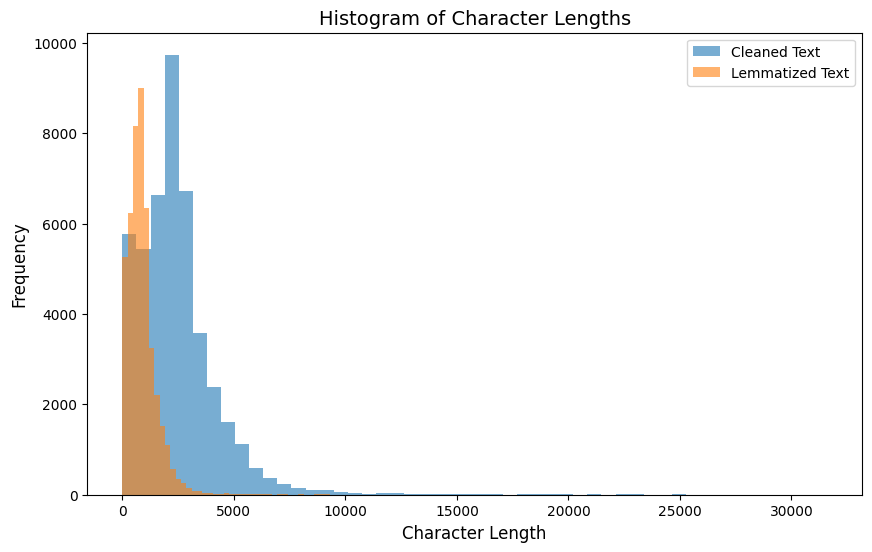

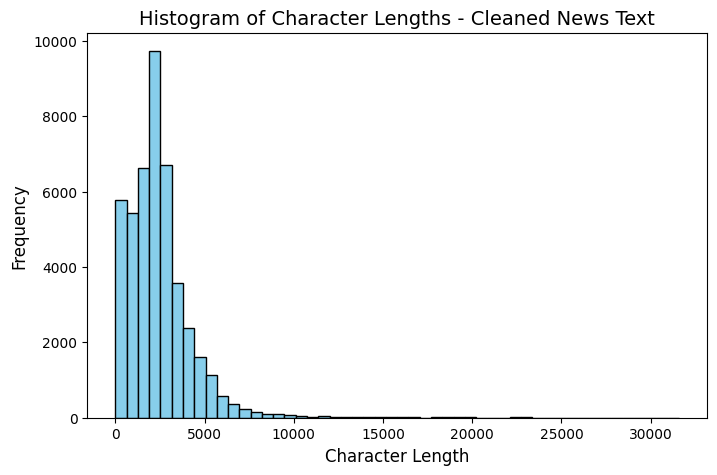

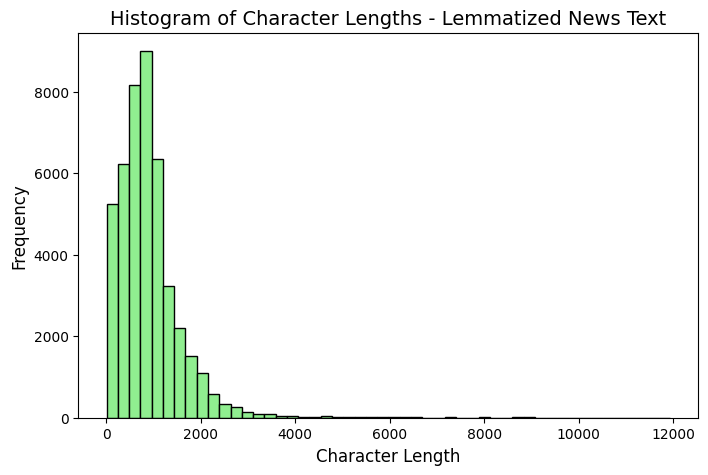

In [33]:
# Create a histogram plot to visualise character lengths
plt.figure(figsize=(10,6))

plt.hist(df_clean["char_length"], bins=50, alpha=0.6, label="Cleaned Text")
plt.hist(df_clean["lemmatized_char_length"], bins=50, alpha=0.6, label="Lemmatized Text")

plt.title("Histogram of Character Lengths", fontsize=14)
plt.xlabel("Character Length", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.show()
# Add histogram for cleaned news text
plt.figure(figsize=(8,5))
plt.hist(df_clean["char_length"], bins=50, color="skyblue", edgecolor="black")
plt.title("Histogram of Character Lengths - Cleaned News Text", fontsize=14)
plt.xlabel("Character Length", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()
# Add histogram for lemmatized news text with POS tags removed
plt.figure(figsize=(8,5))
plt.hist(df_clean["lemmatized_char_length"], bins=50, color="lightgreen", edgecolor="black")
plt.title("Histogram of Character Lengths - Lemmatized News Text", fontsize=14)
plt.xlabel("Character Length", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

In [35]:
!pip install wordcloud

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

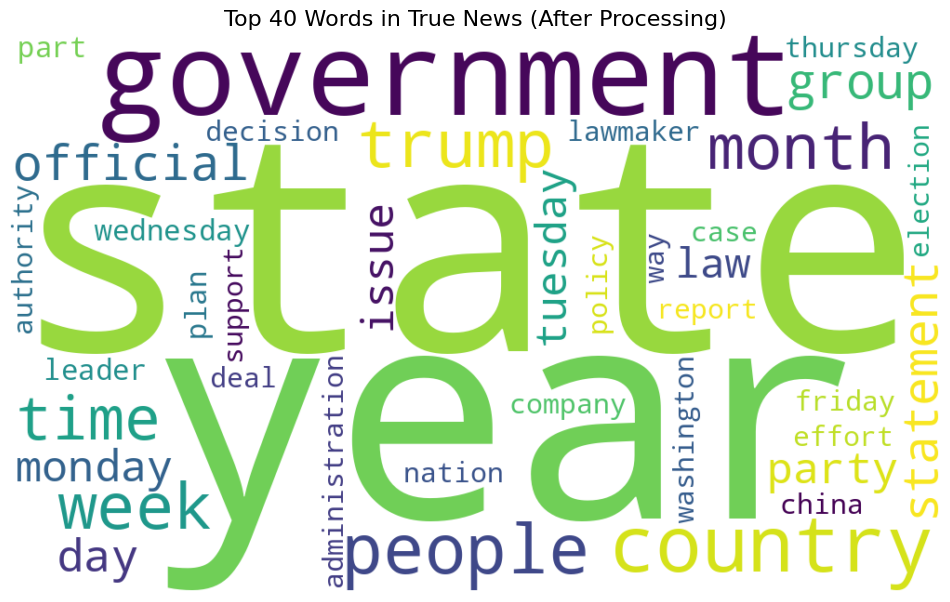

In [37]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text
from wordcloud import WordCloud
# Filter news with label 1 (True News) and convert to it string and handle any non-string values
true_train = train_df[train_df["news_label"] == 1]
true_train_text = " ".join(true_train["lemmatized_text"].dropna().astype(str))

# Generate word cloud for True News
wordcloud_true = WordCloud(width=1000,
                      height=600,
                      background_color="white",
                      max_words=40,
                      colormap="viridis").generate(true_train_text)

# Plot word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud_true, interpolation="bilinear")
plt.axis("off")
plt.title("Top 40 Words in True News (After Processing)", fontsize=16)
plt.show()

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

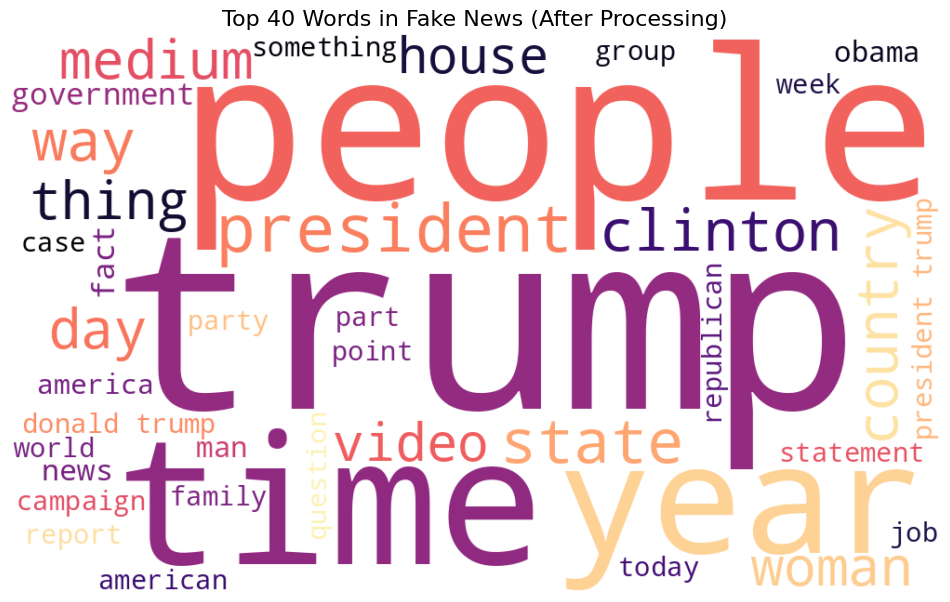

In [38]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
fake_train = train_df[train_df["news_label"] == 0]
fake_train_text = " ".join(fake_train["lemmatized_text"].dropna().astype(str))

# Generate word cloud for Fake News
wordcloud_fake = WordCloud(width=1000,
                           height=600,
                           background_color="white",
                           max_words=40,
                           colormap="magma").generate(fake_train_text)

# Plot
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud_fake, interpolation="bilinear")
plt.axis("off")
plt.title("Top 40 Words in Fake News (After Processing)", fontsize=16)
plt.show()

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [39]:
# Write a function to get the specified top n-grams
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngrams(corpus, n=20, ngram_range=(1,2)):
    # If input is a single string, convert to list
    if isinstance(corpus, str):
        corpus = [corpus]

    # Initialize CountVectorizer
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    X = vectorizer.fit_transform(corpus)

    # Sum up counts of each n-gram
    freqs = X.sum(axis=0)
    freqs = freqs.A1  # convert to 1D array

    # Map n-grams to their frequencies
    ngrams_freq = dict(zip(vectorizer.get_feature_names_out(), freqs))

    # Create DataFrame sorted by frequency
    top_ngrams_df = pd.DataFrame(ngrams_freq.items(), columns=["ngram", "frequency"])
    top_ngrams_df = top_ngrams_df.sort_values(by="frequency", ascending=False).head(n)

    return top_ngrams_df

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [40]:
# Handle NaN values in the text data
# Replace NaN in 'lemmatized_text' with empty string
df_clean['lemmatized_text'] = df_clean['lemmatized_text'].fillna("missing_text")

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

            ngram  frequency
36517       trump      33432
33870       state      25471
27911   president      19238
30004     reuters      16626
14583  government      13963
39046        year      13189
16570       house      12942
26729      people      10928
26396       party      10490
11155    election      10072


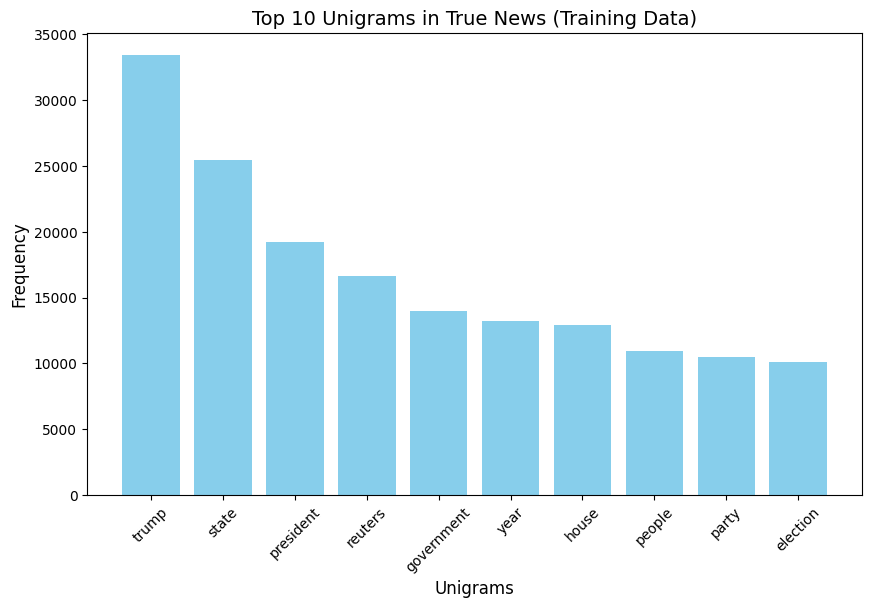

In [41]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
top_true_unigrams = get_top_ngrams(true_train_text, n=10, ngram_range=(1,1))
print(top_true_unigrams)

plt.figure(figsize=(10,6))
plt.bar(top_true_unigrams["ngram"], top_true_unigrams["frequency"], color="skyblue")
plt.title("Top 10 Unigrams in True News (Training Data)", fontsize=14)
plt.xlabel("Unigrams", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45)
plt.show()

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



                       ngram  frequency
221345          donald trump       2073
62543           barack obama       1992
784929    washington reuters       1965
554676      president barack       1940
556799       president trump       1888
617105     reuters president       1799
555149      president donald       1789
648073       secretary state       1662
331032  house representative       1627
750739        trump campaign       1433


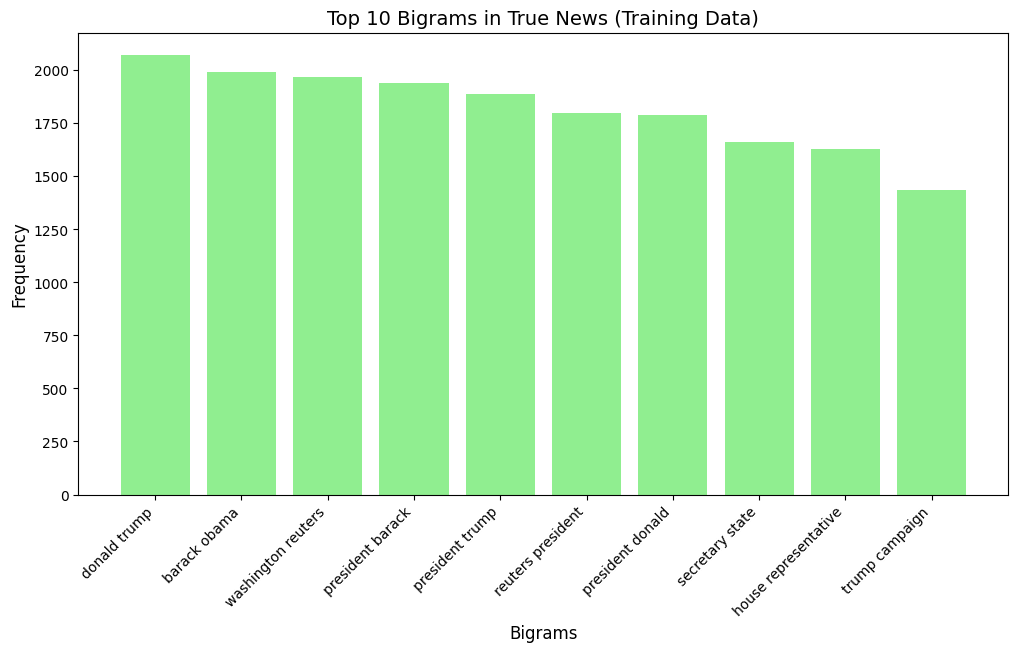

In [42]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
top_true_bigrams = get_top_ngrams(true_train_text, n=10, ngram_range=(2,2))
print(top_true_bigrams)

plt.figure(figsize=(12,6))
plt.bar(top_true_bigrams["ngram"], top_true_bigrams["frequency"], color="lightgreen")
plt.title("Top 10 Bigrams in True News (Training Data)", fontsize=14)
plt.xlabel("Bigrams", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



                                ngram  frequency
1018175        president barack obama       1749
1020128        president donald trump        798
1473945  washington reuters president        558
1137885       reuters president trump        547
1196549           secretary state rex        481
1026967      president vladimir putin        465
1278727           state rex tillerson        462
1248298             speaker paul ryan        368
722148         leader mitch mcconnell        344
202519       chancellor angela merkel        317


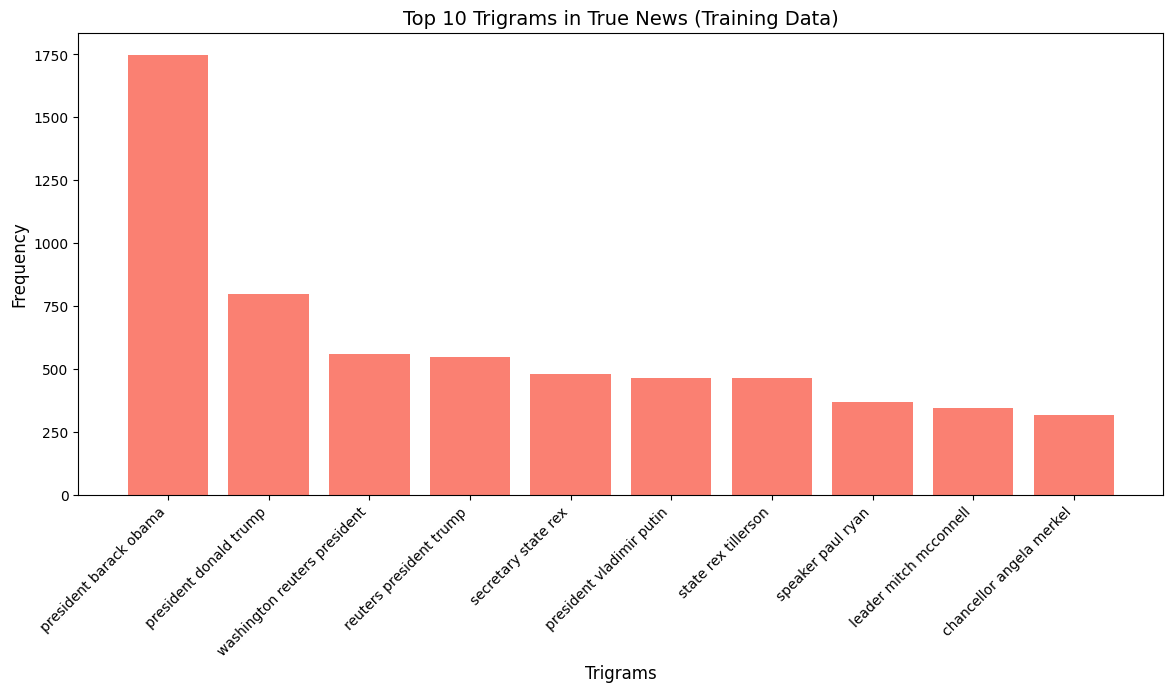

In [43]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
top_true_trigrams = get_top_ngrams(true_train_text, n=10, ngram_range=(3,3))
print(top_true_trigrams)

plt.figure(figsize=(14,6))
plt.bar(top_true_trigrams["ngram"], top_true_trigrams["frequency"], color="salmon")
plt.title("Top 10 Trigrams in True News (Training Data)", fontsize=14)
plt.xlabel("Trigrams", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

           ngram  frequency
74311      trump      47289
55698  president      19163
52522     people      18529
68108      state      14766
13072    clinton      12554
72766       time      12416
80541       year      10500
48298       news      10282
34500      image       9845
49490      obama       8971


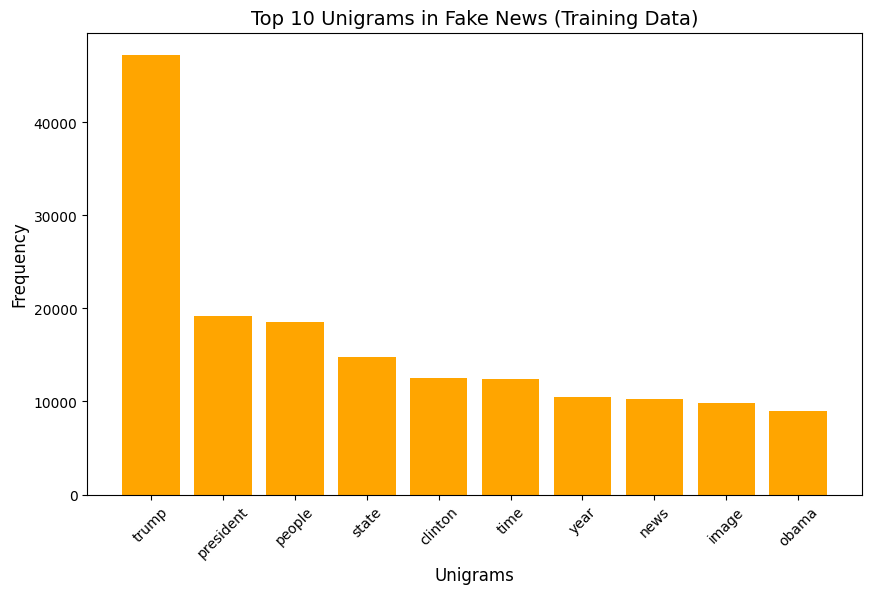

In [44]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
top_fake_unigrams = get_top_ngrams(fake_train_text, n=10, ngram_range=(1,1))
print(top_fake_unigrams)

plt.figure(figsize=(10,6))
plt.bar(top_fake_unigrams["ngram"], top_fake_unigrams["frequency"], color="orange")
plt.title("Top 10 Unigrams in Fake News (Training Data)", fontsize=14)
plt.xlabel("Unigrams", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45)
plt.show()

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



                        ngram  frequency
237279           donald trump       3685
616834        president trump       2864
615894        president obama       1894
823846         trump campaign       1409
828388        trump supporter       1333
63982            barack obama       1294
121303           century wire       1272
708555        secretary state       1114
827549  trump realdonaldtrump       1089
755211       state department       1083


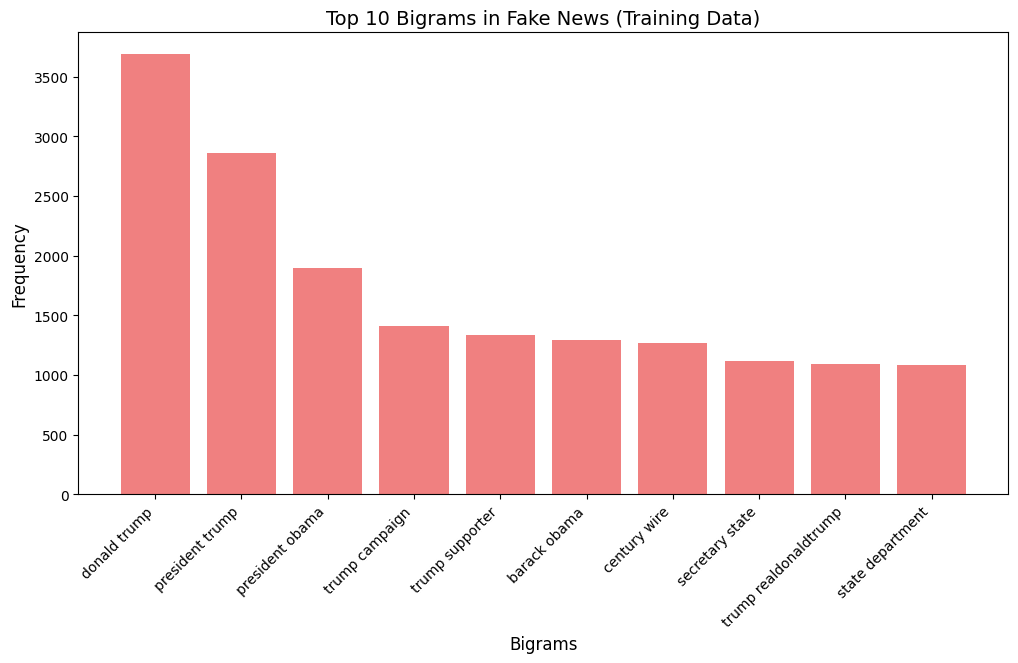

In [45]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
top_fake_bigrams = get_top_ngrams(fake_train_text, n=10, ngram_range=(2,2))
print(top_fake_bigrams)

plt.figure(figsize=(12,6))
plt.bar(top_fake_bigrams["ngram"], top_fake_bigrams["frequency"], color="lightcoral")
plt.title("Top 10 Bigrams in Fake News (Training Data)", fontsize=14)
plt.xlabel("Bigrams", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



                                ngram  frequency
800235              news century wire        630
953779         president barack obama        536
361948   donald trump realdonaldtrump        510
576164             image video screen        436
1347988          video screen capture        411
955656         president donald trump        227
335564   department homeland security        195
571569               image chip image        177
557914          house press secretary        170
1102254       secretary state clinton        169


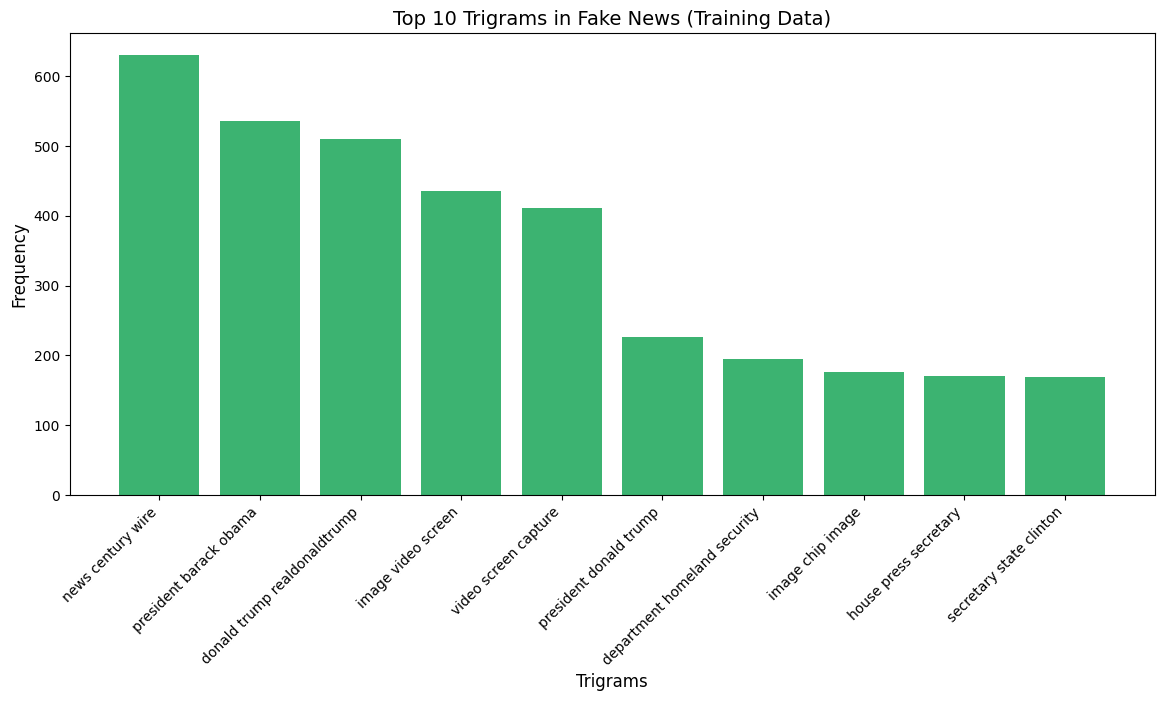

In [46]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
top_fake_trigrams = get_top_ngrams(fake_train_text, n=10, ngram_range=(3,3))
print(top_fake_trigrams)

plt.figure(figsize=(14,6))
plt.bar(top_fake_trigrams["ngram"], top_fake_trigrams["frequency"], color="mediumseagreen")
plt.title("Top 10 Trigrams in Fake News (Training Data)", fontsize=14)
plt.xlabel("Trigrams", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [ ]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [ ]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [ ]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [ ]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [48]:
pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 54.8 MB/s eta 0:00:00


In [49]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
import gensim.downloader as api
word2vec_model = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [50]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data
import numpy as np
def get_doc_vector(text, model):
    words = text.split()
    word_vecs = []

    for word in words:
        if word in model:
            word_vecs.append(model[word])

    if len(word_vecs) > 0:
        return np.mean(word_vecs, axis=0)
    else:
        # If none of the words exist in the model, return zero vector
        return np.zeros(model.vector_size)

# ----------------------------
# Training data vectors
# ----------------------------
X_train_vectors = np.array([get_doc_vector(text, word2vec_model) for text in train_df["lemmatized_text"].astype(str)])

# ----------------------------
# Validation data vectors
# ----------------------------
X_val_vectors = np.array([get_doc_vector(text, word2vec_model) for text in val_df["lemmatized_text"].astype(str)])


print("Training vectors shape:", X_train_vectors.shape)
print("Validation vectors shape:", X_val_vectors.shape)


## Extract the target variable for the training data and validation data
y_train = train_df["news_label"].values
y_val = val_df["news_label"].values

Training vectors shape: (31428, 300)
Validation vectors shape: (13470, 300)


## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [52]:
## Initialise Logistic Regression model
logreg_model = LogisticRegression(
    solver='liblinear',   # good for binary classification
    random_state=42
)
## Train Logistic Regression model on training data
logreg_model.fit(X_train_vectors, y_train)
## Predict on validation data
y_val_pred = logreg_model.predict(X_val_vectors)

##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [53]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels

# Accuracy
accuracy = accuracy_score(y_val, y_val_pred)

# Precision
precision = precision_score(y_val, y_val_pred)

# Recall
recall = recall_score(y_val, y_val_pred)

# F1-score
f1 = f1_score(y_val, y_val_pred)

# Print the metrics
print(f"Validation Accuracy : {accuracy:.4f}")
print(f"Validation Precision: {precision:.4f}")
print(f"Validation Recall   : {recall:.4f}")
print(f"Validation F1-score : {f1:.4f}")


Validation Accuracy : 0.9298
Validation Precision: 0.9193
Validation Recall   : 0.9348
Validation F1-score : 0.9270


In [54]:
# Classification Report
report = classification_report(y_val, y_val_pred, target_names=["Fake", "True"])
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

        Fake       0.94      0.93      0.93      7045
        True       0.92      0.93      0.93      6425

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [55]:
## Initialise Decision Tree model
dt_model = DecisionTreeClassifier(
    criterion='gini',       # 'gini' or 'entropy'
    max_depth=None,         # You can set a max depth if needed
    random_state=42
)
## Train Decision Tree model on training data
dt_model.fit(X_train_vectors, y_train)

## Predict on validation data
y_val_pred_dt = dt_model.predict(X_val_vectors)

##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [56]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels

# Accuracy
accuracy_dt = accuracy_score(y_val, y_val_pred_dt)

# Precision
precision_dt = precision_score(y_val, y_val_pred_dt)

# Recall
recall_dt = recall_score(y_val, y_val_pred_dt)

# F1-score
f1_dt = f1_score(y_val, y_val_pred_dt)

# Print the metrics
print(f"Decision Tree Validation Accuracy : {accuracy_dt:.4f}")
print(f"Decision Tree Validation Precision: {precision_dt:.4f}")
print(f"Decision Tree Validation Recall   : {recall_dt:.4f}")
print(f"Decision Tree Validation F1-score : {f1_dt:.4f}")

Decision Tree Validation Accuracy : 0.8459
Decision Tree Validation Precision: 0.8453
Decision Tree Validation Recall   : 0.8285
Decision Tree Validation F1-score : 0.8368


In [57]:
# Classification Report
report_dt = classification_report(y_val, y_val_pred_dt, target_names=["Fake", "True"])
print("Decision Tree Classification Report:\n")
print(report_dt)

Decision Tree Classification Report:

              precision    recall  f1-score   support

        Fake       0.85      0.86      0.85      7045
        True       0.85      0.83      0.84      6425

    accuracy                           0.85     13470
   macro avg       0.85      0.85      0.85     13470
weighted avg       0.85      0.85      0.85     13470



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [58]:
## Initialise Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,       # Number of trees in the forest
    criterion='gini',       # 'gini' or 'entropy'
    max_depth=None,         # You can set a max depth if needed
    random_state=42,
    n_jobs=-1               # Use all available cores for faster training
)
## Train Random Forest model on training data
rf_model.fit(X_train_vectors, y_train)
## Predict on validation data
y_val_pred_rf = rf_model.predict(X_val_vectors)

 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [59]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
# Accuracy
accuracy_rf = accuracy_score(y_val, y_val_pred_rf)

# Precision
precision_rf = precision_score(y_val, y_val_pred_rf)

# Recall
recall_rf = recall_score(y_val, y_val_pred_rf)

# F1-score
f1_rf = f1_score(y_val, y_val_pred_rf)

# Print the metrics
print(f"Random Forest Validation Accuracy : {accuracy_rf:.4f}")
print(f"Random Forest Validation Precision: {precision_rf:.4f}")
print(f"Random Forest Validation Recall   : {recall_rf:.4f}")
print(f"Random Forest Validation F1-score : {f1_rf:.4f}")

Random Forest Validation Accuracy : 0.9267
Random Forest Validation Precision: 0.9289
Random Forest Validation Recall   : 0.9164
Random Forest Validation F1-score : 0.9226


In [60]:
# Classification Report
report_rf = classification_report(y_val, y_val_pred_rf, target_names=["Fake", "True"])
print("Random Forest Classification Report:\n")
print(report_rf)

Random Forest Classification Report:

              precision    recall  f1-score   support

        Fake       0.92      0.94      0.93      7045
        True       0.93      0.92      0.92      6425

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.